In [1]:
import warnings
import os
warnings.filterwarnings("ignore") 

# Suppress TensorFlow logging messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import logomaker as lm
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

from akita_utils.logo_utils import (collect_flanked_sequences, 
                                        reorder_by_hamming_dist, 
                                        prepare_nucleotide_count_table, 
                                        plot_seq_matrix,
                                        plot_logo_from_counts)

from helper import read_and_average_genomic_exp

### Reading disruption score data

In [4]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD" # disruption score here (stands for squared contact difference)
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruption_by_permutation"

# reading data, averaging over targets and backgrounds
df = read_and_average_genomic_exp(data_dir, stat_to_average=stat_of_analysis_interest)

# appending scores to the table with genomic copordinates
input_tsv_path = "/home1/smaruj/akitaV2-analyses/input_data/preprocess_boundary_CTCFs/output/CTCFs_jaspar_filtered_mm10.tsv"
input_tsv = pd.read_csv(input_tsv_path, sep="\t")
input_tsv["SCD"] = df["SCD"]

reading h5 files to dataframes
averaging over targets
collecting data for SCD


In [5]:
# num of sites the further analysis is based on
num_sites = 150

# sites with top disruption score
sites = input_tsv.sort_values(by=[stat_of_analysis_interest], ascending=False)[:num_sites].reset_index(drop=True)

### Visualizing sequences as a matrix

In [6]:
dna_matrix = collect_flanked_sequences(sites)

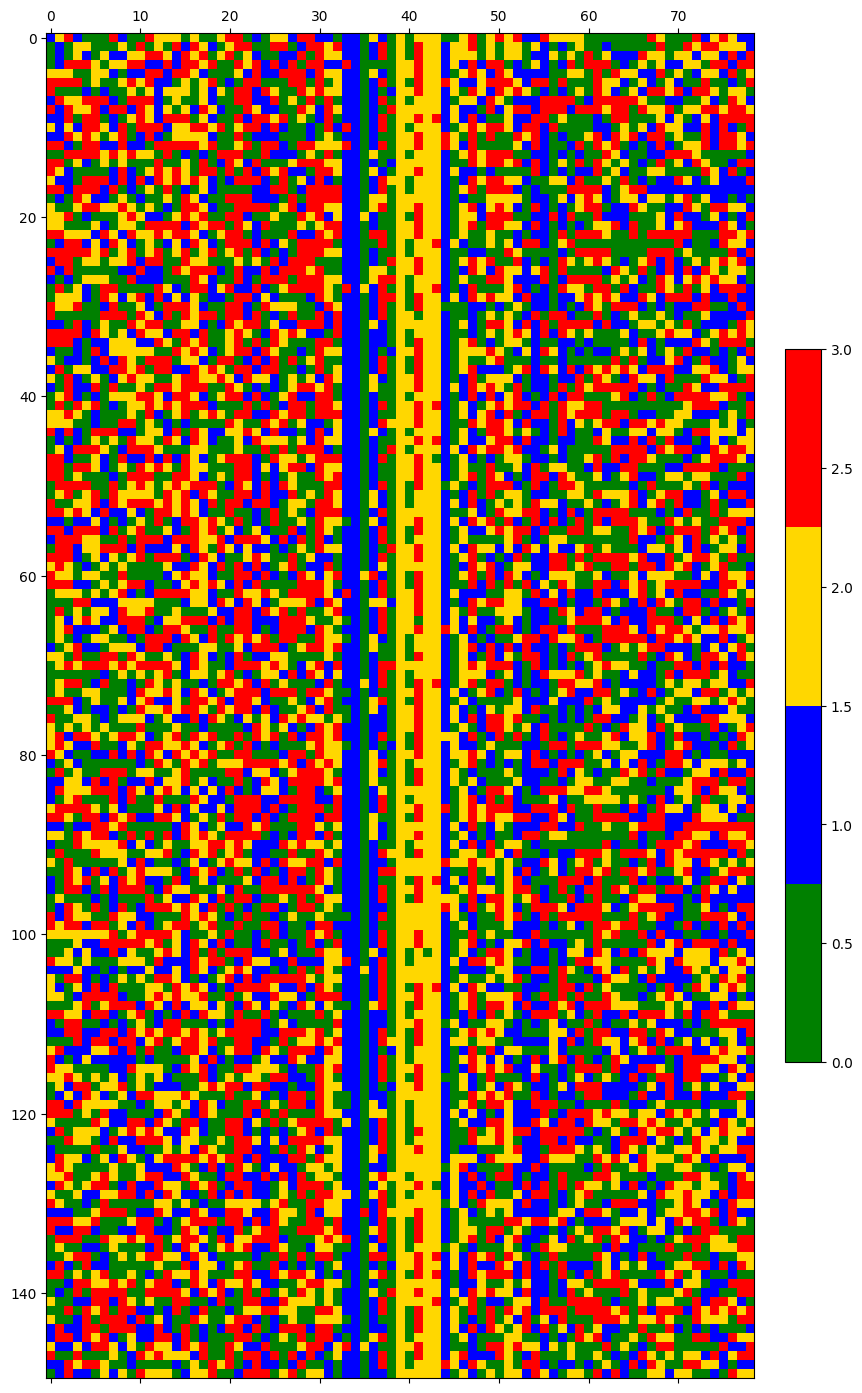

In [7]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=True)

### Creating logo based on the sites with top discription scores

In [8]:
nt_count_table = prepare_nucleotide_count_table(sites)

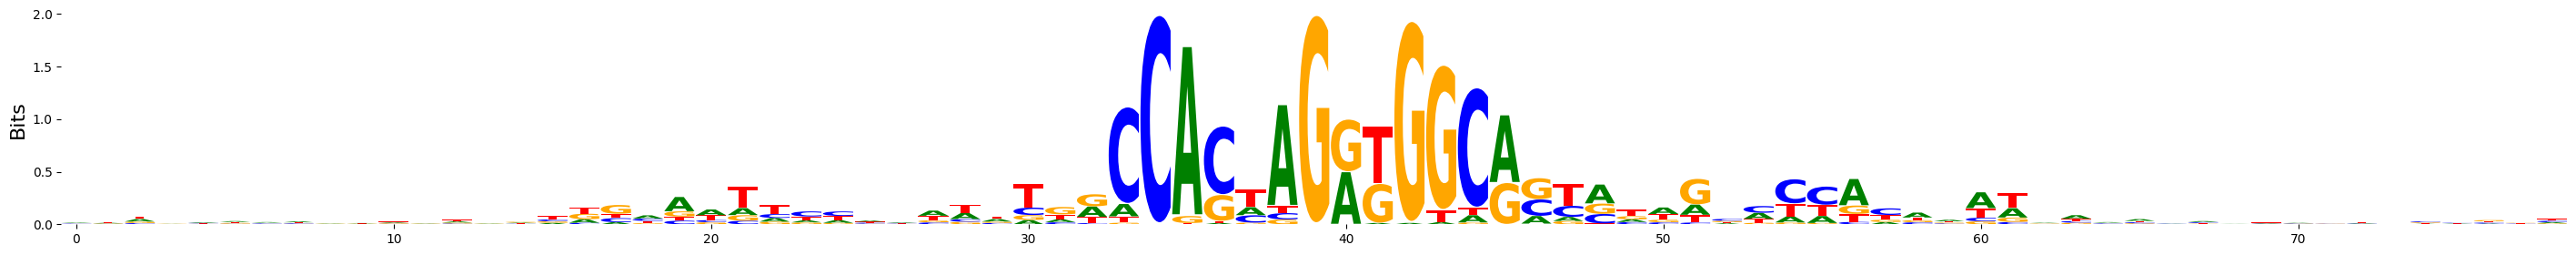

In [9]:
plot_logo_from_counts(nt_count_table)

### Saving the logo as pdf file

In [12]:
cropped_nt_count_table = nt_count_table[15:-15,:]

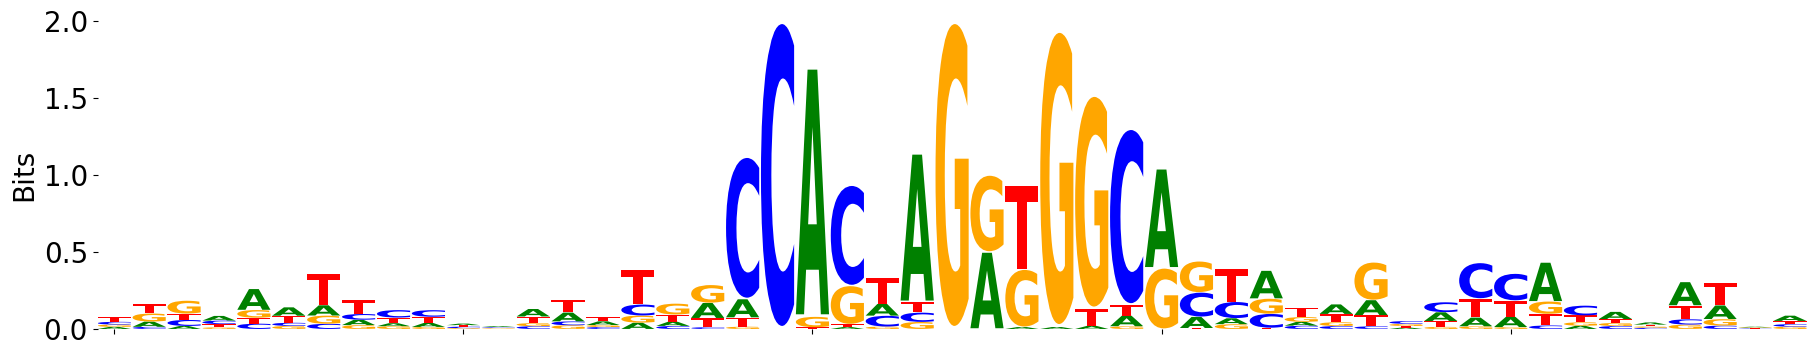

In [14]:
# saving logo
logo_height = 4
logo_width = 0.45
    
dna_prob = normalize(cropped_nt_count_table, axis=1, norm="l1")
dna_prob_df = pd.DataFrame(dna_prob, columns=["A", "C", "G", "T"])

logo_params = {"df": lm.transform_matrix(dna_prob_df, from_type="probability", to_type="information"),
            "figsize": (logo_width * dna_prob_df.shape[0], logo_height),
            "show_spines": False,
            "vpad": 0.02}

logo = lm.Logo(**logo_params)
logo.ax.set_ylabel("Bits", fontsize=20)
logo.ax.set_ylim(0, 2)
logo.ax.set_yticks([0, 0.5, 1, 1.5, 2], minor=False)
logo.ax.set_xticklabels([])

plt.yticks(fontsize=20)
# logo.fig.savefig("./plots/disruption_score_logo.pdf", format="pdf", bbox_inches="tight")